In [32]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import pprint
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=d23f278725ea70a714b66d343216f7b7c11609c83131e1b92043efb6c0951c3c
  Stored in directory: /root/.cache/pip/wheels/df/30/8a/1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 3.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

ImportError: ignored

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [38]:
diabetes


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], 
                                                    diabetes['target'], random_state=66)


alpha_set = [100, 10, 1, 0.1, 0.01, 0.001]
for alpha in alpha_set:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  print("При alpha = {} R-квадрат на обучающем наборе {:.2f}".format(alpha, lasso.score(X_train, y_train)))
  print("При alpha = {} R-квадрат на обучающем наборе {:.2f}".format(alpha, lasso.score(X_test, y_test)))
  print(' ')


При alpha = 100 R-квадрат на обучающем наборе 0.00
При alpha = 100 R-квадрат на обучающем наборе -0.00
 
При alpha = 10 R-квадрат на обучающем наборе 0.00
При alpha = 10 R-квадрат на обучающем наборе -0.00
 
При alpha = 1 R-квадрат на обучающем наборе 0.36
При alpha = 1 R-квадрат на обучающем наборе 0.34
 
При alpha = 0.1 R-квадрат на обучающем наборе 0.50
При alpha = 0.1 R-квадрат на обучающем наборе 0.49
 
При alpha = 0.01 R-квадрат на обучающем наборе 0.51
При alpha = 0.01 R-квадрат на обучающем наборе 0.51
 
При alpha = 0.001 R-квадрат на обучающем наборе 0.51
При alpha = 0.001 R-квадрат на обучающем наборе 0.52
 


In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], 
                                                    diabetes['target'], random_state=66)


alpha_set = [100, 10, 1, 0.1, 0.01, 0.001]
column_names = diabetes.feature_names
atributes = {}
for alpha in alpha_set:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  print("При alpha = {} coef".format(alpha))
  for i, a in enumerate(column_names):
    if a in atributes.keys():
      atributes[a].append(lasso.coef_[i])
    else:
      atributes[a] = [lasso.coef_[i]]

vliyanie = []
for i in atributes.keys():
  vliyanie.append((i, sum(atributes[i])/len(atributes[i])))
vliyanie = sorted(vliyanie, key=lambda x: x[1])

for i in vliyanie:  
  print('Для {} среднее влияние {}'.format(i[0], i[1]))




При alpha = 100 coef
При alpha = 10 coef
При alpha = 1 coef
При alpha = 0.1 coef
При alpha = 0.01 coef
При alpha = 0.001 coef
Для s1 среднее влияние -150.77173651450616
Для sex среднее влияние -70.03197571241573
Для s3 среднее влияние -22.186503621742393
Для age среднее влияние 3.179692313296856
Для s6 среднее влияние 22.383587153209273
Для s4 среднее влияние 23.917658790589396
Для s2 среднее влияние 69.16827940555403
Для bp среднее влияние 166.17367357051197
Для bmi среднее влияние 319.6710796834264
Для s5 среднее влияние 352.5379382538187


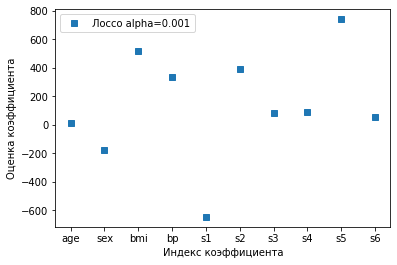

In [54]:
plt.plot(column_names, lasso.coef_, 's', label="Лоссо alpha=0.001")
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')

plt.legend()

In [70]:
from sklearn.utils import shuffle

for i in range(100000):
  y_train2 = shuffle(y_train, random_state=66)
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train2)
  if lasso.score(X_test, y_test) > 0.5:
    print("При alpha = {} R-квадрат на обучающем наборе {:.2f}".format(alpha, lasso.score(X_test, y_test)))


In [59]:

alpha_set = [100, 10, 1, 0.1, 0.01, 0.001]


При alpha = 100 R-квадрат на обучающем наборе 0.00
При alpha = 100 R-квадрат на обучающем наборе -0.00
 
При alpha = 10 R-квадрат на обучающем наборе 0.00
При alpha = 10 R-квадрат на обучающем наборе -0.00
 
При alpha = 1 R-квадрат на обучающем наборе 0.32
При alpha = 1 R-квадрат на обучающем наборе 0.35
 
При alpha = 0.1 R-квадрат на обучающем наборе 0.48
При alpha = 0.1 R-квадрат на обучающем наборе 0.56
 
При alpha = 0.01 R-квадрат на обучающем наборе 0.49
При alpha = 0.01 R-квадрат на обучающем наборе 0.56
 
При alpha = 0.001 R-квадрат на обучающем наборе 0.50
При alpha = 0.001 R-квадрат на обучающем наборе 0.56
 
